# Group I - Breast Cancer classification

The Breast Cancer data set is a real-valued multivariate data that consists of two classes, where each class means whether a patient has breast cancer or not. The two categories are: malignant and benign.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).


In [1]:
# This code cell does not need to be changed
import os
import pandas as pd

dataFileName = os.path.join( "data", "breastcancer.csv")
dataDF = pd.read_csv(dataFileName)
dataDF.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Part 1

Projecting the thirty-dimensional Breast Cancer data to two-dimensional principal components using PCA and tSNE approaches. For each approach, I plot the result and then compare them.

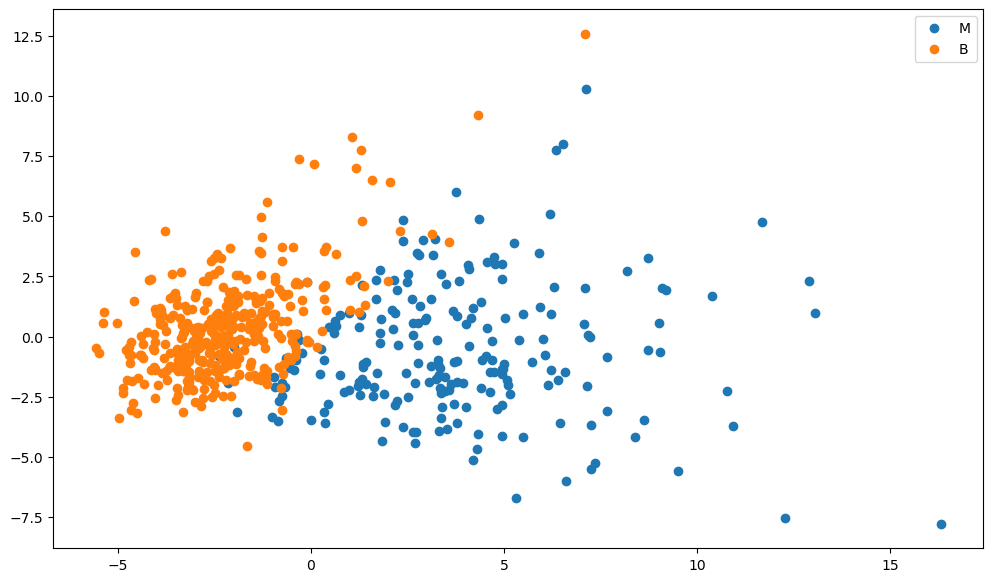

In [2]:
# PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

feature_list = dataDF.columns[2:]
features = dataDF[feature_list].values
features = StandardScaler().fit_transform(features)
pca = PCA(n_components = 2, random_state = 42)
reduced = pca.fit_transform(features)

plt.figure(figsize = (12,7))
for diagnosis in dataDF["diagnosis"].unique():
    mask = dataDF["diagnosis"] == diagnosis
    plt.plot(reduced[mask,0],reduced[mask,1], "o", label = diagnosis)
plt.legend()

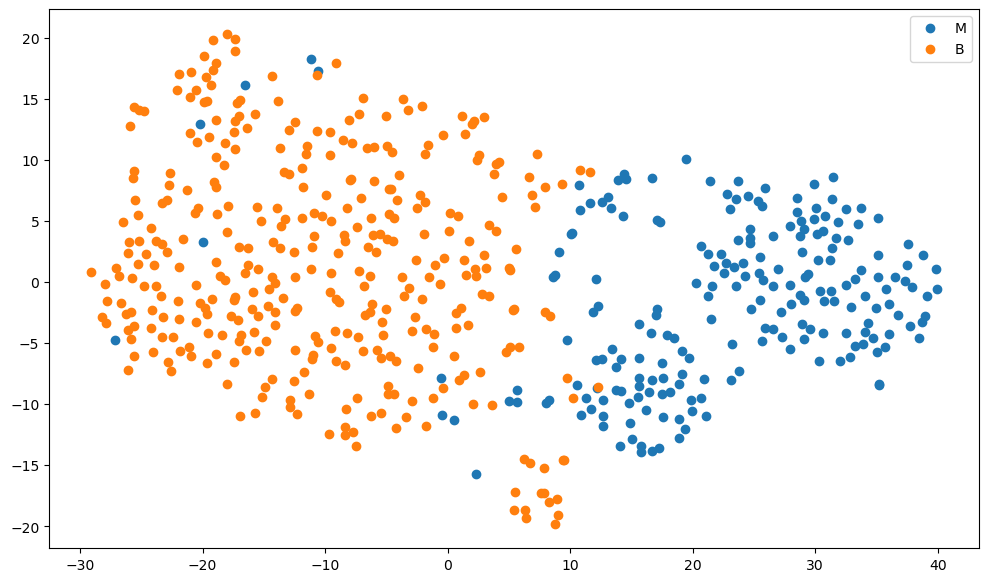

In [3]:
# tSNE
import numpy as np
from sklearn.manifold import TSNE

reduced = TSNE(n_components = 2, random_state = 42).fit_transform(features)

plt.figure(figsize = (12,7))
for diagnosis in dataDF["diagnosis"].unique():
    mask = dataDF["diagnosis"] == diagnosis
    plt.plot(reduced[mask,0],reduced[mask,1], "o", label = diagnosis)
plt.legend()

**Comparison: PCA vs tSNE**

*PCA*:

PCA is a linear dimensionality reduction technique that finds the axes (principal components) which maximize the variance in the dataset. In the PCA visualization, the data points are spread mostly along the principal component that captures the most variance. The clusters for malignant and benign samples show some degree of separation but there is a notable amount of overlap between the two classes. This suggests that while PCA can reduce dimensionality to the most informative directions, it may not always provide the most effective separation for classification purposes, especially when the data contains complex, non-linear structures.


*t-SNE*:

t-SNE is a non-linear technique aimed at preserving local structures and relationships in the high-dimensional space after the reduction. The t-SNE visualization demonstrates a clearer separation between the malignant and benign clusters, indicating that it is better at distinguishing the two classes for this particular dataset.
The tight clustering and greater separation seen with t-SNE suggest that the technique can reveal more nuanced data structures, which may not be linearly separable, and could be more suitable for datasets with complex underlying patterns.



--> Comparing PCA and t-SNE, the t-SNE plot exhibits a clearer distinction between the two classes, revealing that non-linear methods like t-SNE can sometimes provide more insight into the dataset's intrinsic structure than linear methods like PCA.

## Part 2

What can I tell about the two types of tumors? Are they easily differentiated by the features computed from a digitized image?

**Answer:** The two types of tumors in the Breast Cancer dataset, malignant (M) and benign (B), are based on the analysis of features computed from digitized images of a fine needle aspirate (FNA) of a breast mass.

From the visualizations provided above using PCA and t-SNE, we can make several observations:

In the PCA plot, there is some separability between the malignant and benign tumors, suggesting that the computed features do indeed capture relevant differences between the two classes. However, there is also some overlap, indicating that the separation is not perfect in the reduced two-dimensional space produced by PCA.The t-SNE plot shows a more distinct separation between the two classes, suggesting that when the local structure of the high-dimensional space is preserved, the features allow for better differentiation.

PCA, being a linear technique, may not capture the non-linear relationships as effectively as t-SNE. Therefore, if the underlying difference between malignant and benign tumors is non-linear in nature, PCA will not provide as clear a separation as t-SNE. The fact that t-SNE, which is better at capturing complex, non-linear relationships between features, provides a clearer distinction suggests that the high-dimensional data might have non-linear structures that are important for classifying the tumors.

In conclusion, while there is evidence that the computed features from digitized images can differentiate between malignant and benign tumors, the effectiveness of this differentiation can depend on the dimensionality reduction and classification techniques used. The features do contain informative patterns, but capturing and leveraging these patterns might require sophisticated methods that account for both linear and non-linear relationships within the data.

# Group II - logistic growth of internet data

The file internet.csv contains the estimated number of internet users (in millions) for each year from 1995
through 2012.


In [4]:
dataFileName = os.path.join( "data", "internet.csv")
dataDF = pd.read_csv(dataFileName)

In [5]:
dataset_df = pd.DataFrame()
dataset_df['year'] = dataDF.index
dataset_df['n_users'] = dataDF['n_users']
dataset_df.head()

,year,n_users
0,0,16
1,1,36
2,2,70
3,3,147
4,4,248


## Part 1

In lecture 6, we used the logistic function with an offset parameter to better fit the curve to some arbitrary starting point:

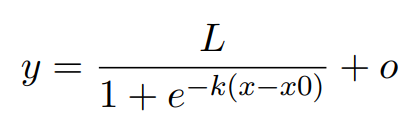

Now, I will fit this model to the data and show to the plots of the data and the curve predicted by the
model. Additionally, I will display the parameters found for the logistic model and explain the meaning of each one.  

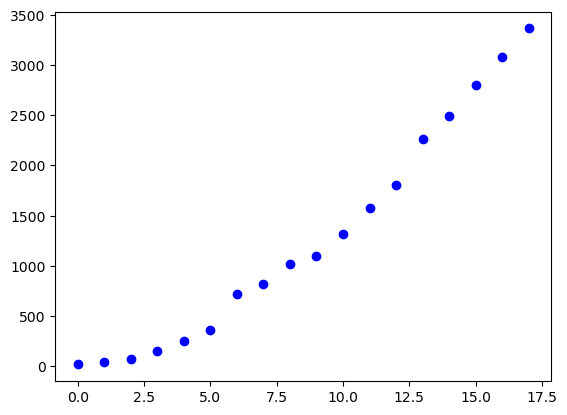

In [6]:
# Plotting the data
x = dataset_df[['year']]
y = dataset_df['n_users']

plt.scatter(x, y, c = 'b')

In [7]:
from scipy.optimize import minimize # Here we are going to use the minimize function 

# Logistic Function
def logistic(x,x0,L,k):
    return L/(1 + np.exp(-k*(x-x0)))

# Cost function - Minimize mean squared error
def log_cost(params, data):
    x0,L,k,offset = params
    pred = logistic(data.iloc[:,0],x0,L,k) + offset
    return np.mean( (pred-data.iloc[:,1])**2)

st_params = [10,1000,0.1,-300]
res=minimize(log_cost,st_params,args=(dataset_df))
x0,L,k,offset = res.x # Best parameters found

# Print the values
print(f"x0: {x0}")
print(f"L: {L}")
print(f"k: {k}")
print(f"offset: {offset}")

x0: 15.22113635374942
L: 6462.207763864435
k: 0.1887154679941833
offset: -384.7279022818989


**Meaning of the parameters**

*x_0*: This is the value of *x* (the year, starting at 1995) at the functions midpoint. In the context of the growth of internet users, *x_0* represents the year at whihc the number of new internet useres is increasing at the maximum rate. After this point, the rate of increase begins to slow down. For this model, *x_0* ≈ 15.22 suggests that the inflection point of the growth curve occurs around the year 2010 (1995 + *x_0*).

*L*: This parameter represents the curve's maximum value as the year (*x*) approaches infinitiy. In the context of internet user growth, *L* ≈ 6462.21 would indicate the maximum potential number of internet users (in millions) that the model predicts, assuming the growth eventually levels off and does not increase indefinitely.

*k*: This parameter is the logistic growth rate or steepness of the curve. A higher value of *k* means that the growth of internet users is faster. For this model, *k* ≈ 0.189 indicates a relatively gradual growth rate.

*Offset*: The offset parameter is a vertical translation of the logistic function. It shifts the entire curve up or down on the graph. In this case, an offset ≈ - 384.73 would be subtracted from the calculated number of internet users (in millions). This suggests that the initial model without the offset was overestimating the number of users and the offset was introduced to correct for this overestimation.

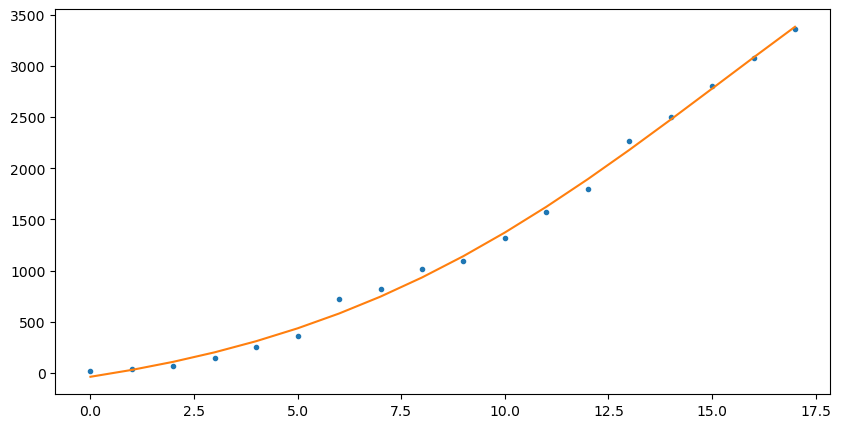

In [8]:
plt.figure(figsize=(10,5))

# Used the model found (logistic model with a set of parameters and an offset) to predict the values
pred = logistic(dataset_df.iloc[:,0],x0,L,k) + offset

# Plot the data and the model built
plt.plot(dataset_df.iloc[:,0],dataset_df.iloc[:,1],'.')
plt.plot(dataset_df.iloc[:,0],pred)

## Part 2

Computing and plotting the residuals of the model found. What can I tell about the model identified based on the Residual Plot? Is a logistic function a good option to model users' growth over time in our dataset?

Text(0, 0.5, 'Residual Value')

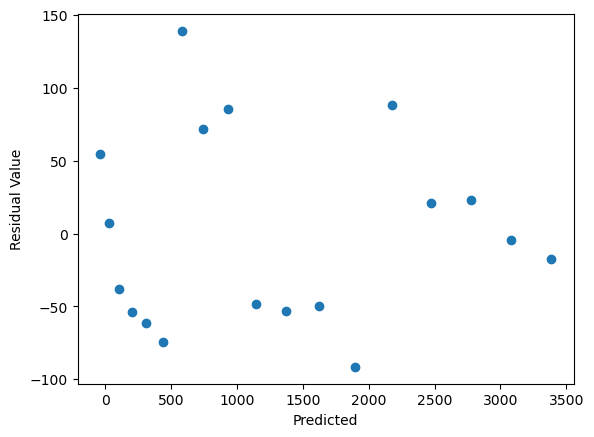

In [9]:
residuals = y - pred

plt.scatter(pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual Value')

The residuals are expected to follow a normal distribution with mean zero, indicating a symmetrical spread with a concentration of data points around the center of the plot. The provided residual plot displays a distribution of points that approximates normality. However, the limited number of data points prevents a definitive conclusion about the model's suitability.

## Part 3

Displaying the 95% interval for its parameters under the assumption that the random error affecting the data points comes from the same distribution for all points.

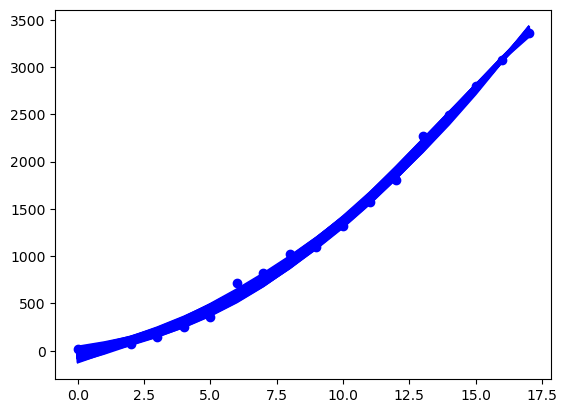

In [10]:
params = []
lines = []
pred = logistic(dataset_df.iloc[:,0],x0,L,k) + offset
residual = dataset_df.iloc[:,1]-pred

plt.scatter(x, y, color='blue')
replicas = 100

df_unc = pd.DataFrame(x)

i = 0;
params = [] # tracking parameters obtained for each replica
for _ in range(replicas):

    rep_data = dataset_df.copy() 

    rep_data.iloc[:,1] = pred + residual * np.random.normal(size=dataset_df.shape[0]) # wild bootstrapping

    res = minimize(log_cost,st_params,args=(rep_data))
    params.append(res.x)
    x0,L,k,offset = res.x
    pred_replica = logistic(dataset_df.iloc[:,0],x0,L,k)+offset

    df_unc =  pd.concat([df_unc, pred_replica.rename(f'replica_{i + 1}')], axis=1) 
    i = i + 1;
    plt.plot(dataset_df.iloc[:,0], df_unc.iloc[:,i] , c = 'blue')

/var/folders/dp/96r0nmqx4vjcyxc81yzfj01r0000gn/T/ipykernel_16648/3280492463.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_unc['median'] = df_unc.quantile(0.5, axis = 1, interpolation = 'midpoint')
/var/folders/dp/96r0nmqx4vjcyxc81yzfj01r0000gn/T/ipykernel_16648/3280492463.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_unc['p2.5'] = df_unc.quantile(0.025, axis = 1,interpolation = 'midpoint')
/var/folders/dp/96r0nmqx4vjcyxc81yzfj01r0000gn/T/ipykernel_16648/3280492463.py:4: PerformanceWarning: DataFrame is highly f

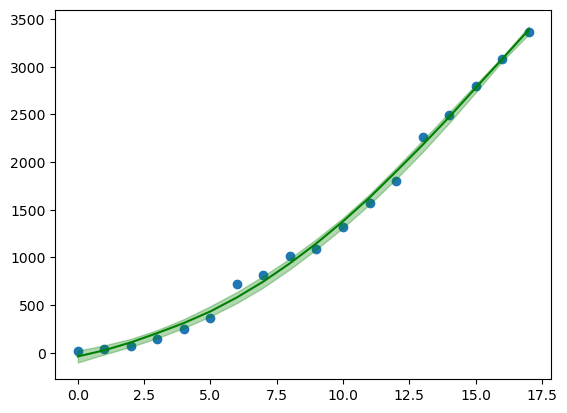

In [11]:
plt.scatter(x, y)
df_unc['median'] = df_unc.quantile(0.5, axis = 1, interpolation = 'midpoint')
df_unc['p2.5'] = df_unc.quantile(0.025, axis = 1,interpolation = 'midpoint')
df_unc['p97.5'] = df_unc.quantile(0.975, axis = 1,interpolation = 'midpoint')

plt.plot(df_unc['year'], df_unc['median'], color = 'green')
plt.fill_between(df_unc[['year']].iloc[:,0], df_unc[['p2.5']].iloc[:,0], df_unc[['p97.5']].iloc[:,0], color='green',alpha=0.3)

Additional to the visualization of the confidence interval, as shown above, it is also interesting to look at the parameters obtained for the boundaries of the interval.

In [12]:
parameter_DF = pd.DataFrame(params)
parameter_DF.rename(columns={0: "x0", 1: "L", 2: "k", 3: "offset"},  inplace = True)

# Getting parameters for lower and upper bound
x0_lower, L_lower, k_lower, offset_lower = parameter_DF.quantile(0.025, interpolation = 'midpoint')
x0_upper, L_upper, k_upper, offset_upper = parameter_DF.quantile(0.975, interpolation = 'midpoint')

# Printing out the obtained parameters
print("Lower bound:")
print("x0:", x0_lower)
print("L:", L_lower)
print("k:", k_lower)
print("offset:", offset_lower, "\n")
print("Upper bound:")
print("x0:", x0_upper)
print("L:", L_upper)
print("k:", k_upper)
print("offset:", offset_upper)

Lower bound:
x0: 13.289424338892196
L: 5086.815224076888
k: 0.11534708425240991
offset: -878.7195833837162 

Upper bound:
x0: 24.185494117065204
L: 14491.259149277756
k: 0.23774544710113432
offset: -194.44382899308886
